In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv')

In [3]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [4]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [5]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

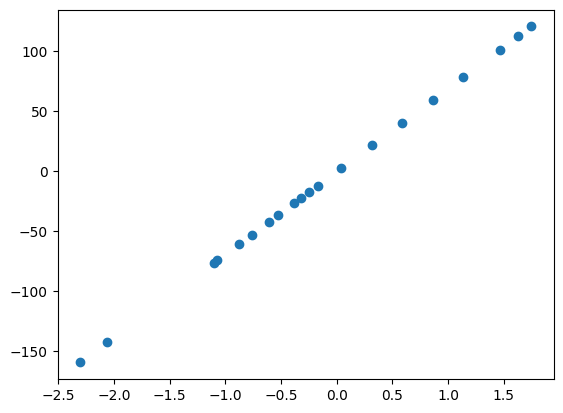

In [6]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [7]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        # task 1
        self.b0 = np.random.randn()
        self.b1 = np.random.randn()
    
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X))
    
    def fit(self, X, Y):  
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1
    

In [8]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0.3434480019437767
-175.58178138105336
initial error: 3092.244915023891


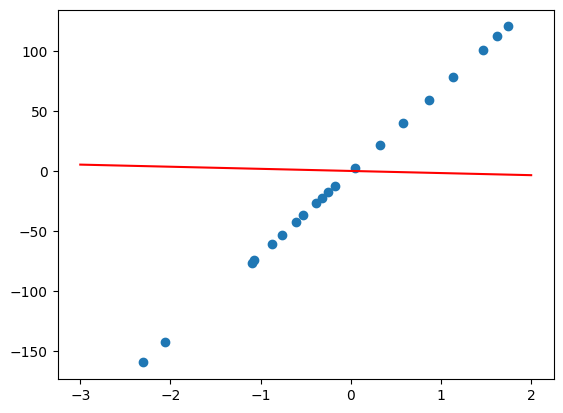

In [9]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [10]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2371.7874028946617


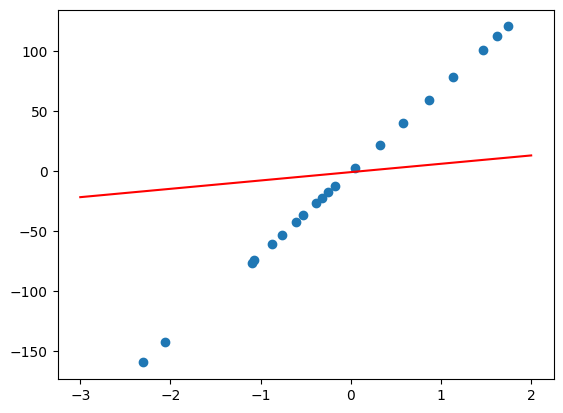

In [11]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [36]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = np.random.randn()
        self.b1 = np.random.randn()
    
    def predict(self, X):
        return self.b0 + self.b1 * X
    
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    
    def plot(self, X, Y, steps, errors):
        X0 = np.linspace(X.min(), X.max(), 100)
        Y0 = self.predict(X0)

        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.scatter(X, Y, label="Data")
        plt.plot(X0, Y0, 'r', label="Regression line")
        plt.legend()
        plt.title("Linear Regression")

        plt.subplot(1, 2, 2)
        plt.plot(steps, errors, 'g')
        plt.title("Training Error")

        plt.show()
    def fit(self, X, Y, alpha=1.0, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        tol = 10**-6
        prev_err = float('inf')
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)

            # task 6

            if new_err > prev_err:
                alpha /= 2
                continue

            # task 4 / 5
            
            if abs(prev_err - new_err) < tol:
                break
            prev_err = new_err
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

# Task 7

error after gradient descent: 4.147076344854342e-08


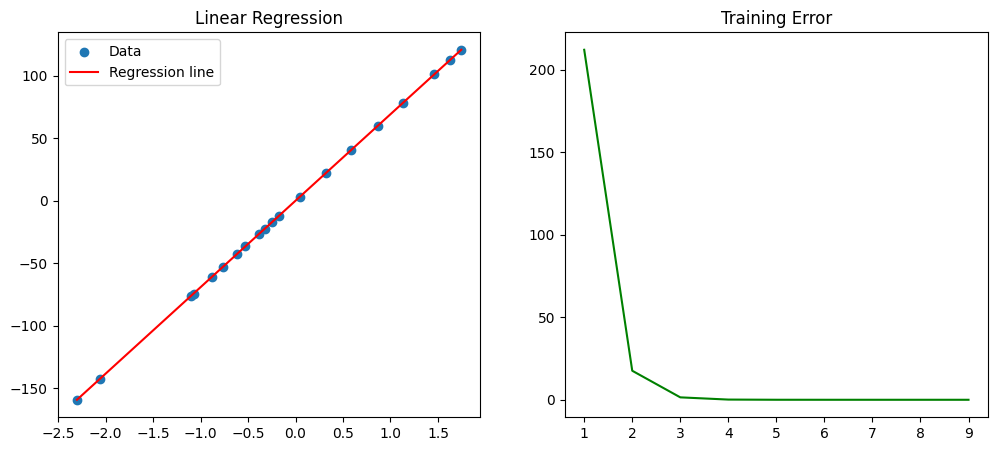

In [37]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)
hyp.plot(x, y, steps, errors)

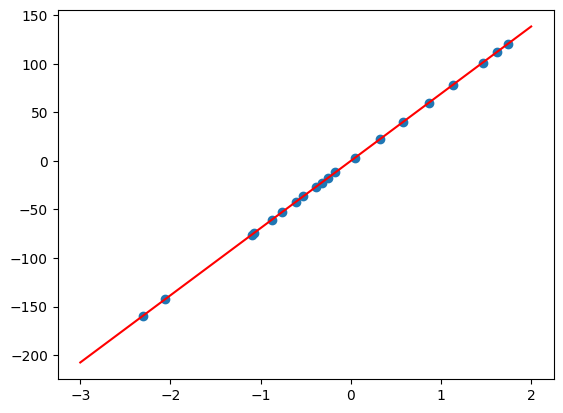

In [31]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

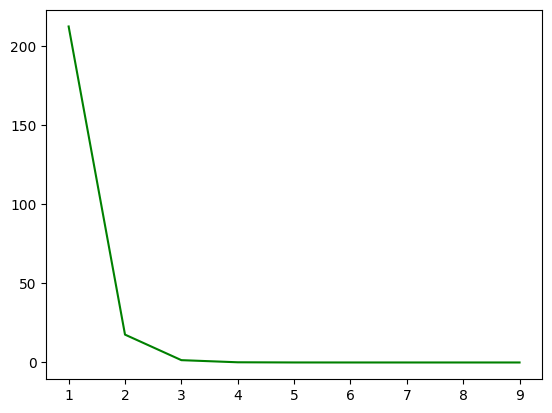

In [26]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

# Task 2

In [35]:
alphas = [0.001, 0.01, 0.1, 1, 10]
for alpha in alphas:
    hyp = Model()
    _, errors = hyp.fit(x, y, alpha=alpha)
    print(f"Alpha: {alpha}, Final error: {errors[-1]}")

Alpha: 0.001, Final error: 2.721555180697023e-06
Alpha: 0.01, Final error: 2.0060362548182942e-25
Alpha: 0.1, Final error: 1.658624426653096e-27
Alpha: 1, Final error: 3.0967720910582346e-29
Alpha: 10, Final error: nan


# Task 3

In [ ]:
if isinstance(x, pd.DataFrame):
    X = x.iloc[:, 0]
if isinstance(y, pd.DataFrame):
    Y = x.iloc[:, 0]